In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('DataFrame.csv')

In [ ]:
selected_columns = ['Yield of CT', 'Latitude', 'Longitude', 'Years since NT started (yrs)', 
                    'Crop rotation with at least 3 crops involved in CT', 
                    'Crop rotation with at least 3 crops involved in NT', 'ST', 
                    'Soil cover in CT', 'Soil cover in NT', 'Weed and pest control CT', 
                    'P', 'E', 'PB', 'Tave', 'Tmax', 'Tmin', 'Crop']

df = df[selected_columns]


In [ ]:
df = df[df['Crop'] == 'maize']

In [44]:
columns_to_drop = ['ST_encoded','ST','Soil cover in CT','Soil cover in NT', 'Crop']
df=df.drop(columns = columns_to_drop)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Yield of CT                                         1287 non-null   float64
 1   Latitude                                            1287 non-null   float64
 2   Longitude                                           1287 non-null   float64
 3   Years since NT started (yrs)                        1287 non-null   int64  
 4   Crop rotation with at least 3 crops involved in CT  1287 non-null   int64  
 5   Crop rotation with at least 3 crops involved in NT  1287 non-null   int64  
 6   Weed and pest control CT                            1287 non-null   int64  
 7   P                                                   1287 non-null   float64
 8   E                                                   1287 non-null   float64
 9

In [37]:
# Check for missing values in the entire DataFrame
missing_values = df.isna().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

# Check if there are any missing values in the entire DataFrame
print("Any missing values in the DataFrame:", df.isna().any().any())


Missing Values:
Yield of CT                                           0
Latitude                                              0
Longitude                                             0
Years since NT started (yrs)                          0
Crop rotation with at least 3 crops involved in CT    0
Crop rotation with at least 3 crops involved in NT    0
Weed and pest control CT                              0
P                                                     0
E                                                     0
PB                                                    0
Tave                                                  0
Tmax                                                  0
Tmin                                                  0
Crop                                                  0
dtype: int64
Any missing values in the DataFrame: False


In [ ]:
df = df.dropna()

In [50]:
df.reset_index(drop=True, inplace=True)

In [59]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


X = df.drop(columns=['Yield of CT'])
y = df['Yield of CT']

# Fit a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features based on importance
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)['Feature']

# Print sorted features
print("Sorted Features based on Random Forest Feature Importance:")
print(sorted_features)


Sorted Features based on Random Forest Feature Importance:
0                                              Latitude
10                                                 Tmax
11                                                 Tmin
1                                             Longitude
6                                                     P
9                                                  Tave
7                                                     E
2                          Years since NT started (yrs)
8                                                    PB
4     Crop rotation with at least 3 crops involved i...
3     Crop rotation with at least 3 crops involved i...
5                              Weed and pest control CT
Name: Feature, dtype: object


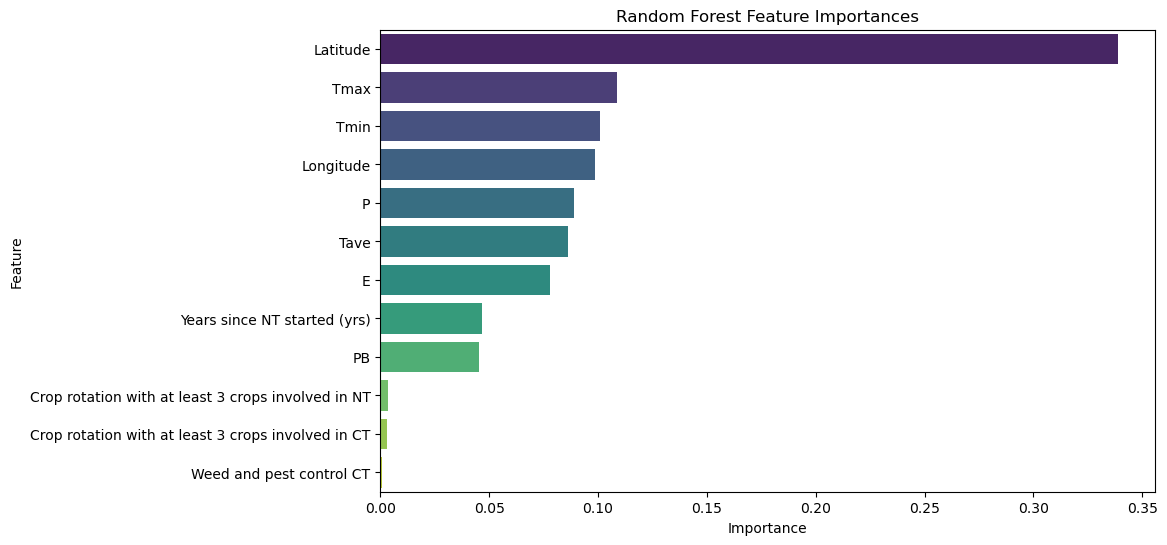

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


X = df.drop(columns=['Yield of CT'])
y = df['Yield of CT']

# Fit a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features based on importance
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_features, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
